## DOW Theory - Case Study

- Understanding technical analysis
- Market trend
- Multiple time frame analysis

- The DOW theory is an approach to trading
- Developed by Charles H. Dow
- Market has 3 trends and phases
    - Bear: downward trend
    - Bull: upward trend
    - Stationary: stable
- Secondary trend
    - High High (HH), High Low (HL), Low High (LH), Low Low (LL)
    - When down trend changes
    - Change from bear to bull
        - HL + HH
    - Change from bull to bear
        - LL + LH
    - Check long timeline to short
        - monthly trend -> weekly -> daily

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from yahoofinancials import YahooFinancials
from http.client import IncompleteRead

In [2]:
data = pd.read_csv('results/focus.csv', index_col=0)
df = data.head(5)

In [3]:
top_companies = []
for i, row in df.iterrows():
    print(i)
    top_companies.append(i)

ADMCM.HE
ICP1V.HE
VIAFIN.HE
NESTE.HE
GOFORE.HE


In [4]:
def price_history(company, timeline):
    max_try = 5
    attemp = 1
    while attemp < max_try:
        try:
            yf = YahooFinancials(company)
            data = yf.get_historical_price_data('2020-04-12', '2021-04-12', timeline)
            data_1 = data[company]['prices']

        except IncompleteRead:
            attemp += 1
            if attemp == max_try:
                print(f'Failed {N}')
        except ValueError as e:
            print(f'{e}: {N}')
            attemp = max_try
        else:
            break
            
    df = pd.DataFrame.from_dict(data_1)
    if timeline == 'weekly':
        df.to_csv(f"results/price_history_weekly_{company.split('.')[0]}.csv")
    elif timeline == 'monthly':
        df.to_csv(f"results/price_history_monthly_{company.split('.')[0]}.csv")
    else:
        df.to_csv(f"results/price_history_{company.split('.')[0]}.csv")

In [5]:
top_prices = []

for i in top_companies:
    price_history(i, 'daily')    
    top_prices.append(f"results/price_history_{i.split('.')[0]}.csv")
    print(f"results/price_history_{i.split('.')[0]}.csv")

results/price_history_ADMCM.csv
results/price_history_ICP1V.csv
results/price_history_VIAFIN.csv
results/price_history_NESTE.csv
results/price_history_GOFORE.csv


In [6]:
top_prices_weekly = []

for i in top_companies:
    price_history(i, 'weekly')    
    top_prices_weekly.append(f"results/price_history_weekly_{i.split('.')[0]}.csv")
    print(f"results/price_history_weekly_{i.split('.')[0]}.csv")

results/price_history_weekly_ADMCM.csv
results/price_history_weekly_ICP1V.csv
results/price_history_weekly_VIAFIN.csv
results/price_history_weekly_NESTE.csv
results/price_history_weekly_GOFORE.csv


In [7]:
top_prices_monthly = []

for i in top_companies:
    price_history(i, 'monthly')    
    top_prices_monthly.append(f"results/price_history_monthly_{i.split('.')[0]}.csv")
    print(f"results/price_history_monthly_{i.split('.')[0]}.csv")

results/price_history_monthly_ADMCM.csv
results/price_history_monthly_ICP1V.csv
results/price_history_monthly_VIAFIN.csv
results/price_history_monthly_NESTE.csv
results/price_history_monthly_GOFORE.csv


In [8]:
df_top_companies = []
for i in top_prices:
    df = pd.read_csv(i, index_col='formatted_date', parse_dates=True)
    del df['Unnamed: 0']
    df_top_companies.append(df)

In [9]:
df_top_companies_weekly = []
for i in top_prices_weekly:
    df = pd.read_csv(i, index_col='formatted_date', parse_dates=True)
    del df['Unnamed: 0']
    df_top_companies_weekly.append(df)

In [10]:
df_top_companies_monthly = []
for i in top_prices_monthly:
    df = pd.read_csv(i, index_col='formatted_date', parse_dates=True)
    del df['Unnamed: 0']
    df_top_companies_monthly.append(df)

In [11]:
df_top_companies[0]

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2020-04-14,1586847600,72.599998,67.199997,72.599998,71.800003,118619,71.226868
2020-04-15,1586934000,73.199997,67.400002,73.199997,68.000000,8693,67.457191
2020-04-16,1587020400,69.199997,66.599998,67.400002,67.000000,4792,66.465179
2020-04-17,1587106800,70.000000,66.599998,67.000000,67.000000,30657,66.465179
2020-04-20,1587366000,67.599998,65.199997,67.000000,67.400002,6935,66.861984
...,...,...,...,...,...,...,...
2021-04-01,1617260400,99.300003,87.000000,95.800003,97.000000,18678,97.000000
2021-04-06,1617692400,96.000000,93.000000,95.000000,95.400002,6483,95.400002
2021-04-07,1617778800,98.000000,94.599998,96.300003,98.000000,5591,98.000000


In [12]:
df_top_companies_weekly[0]

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2020-04-12,1586725200,73.199997,66.599998,73.000000,67.000000,162761.0,66.465179
2020-04-19,1587330000,76.800003,64.599998,67.000000,71.800003,48227.0,71.226868
2020-04-26,1587934800,74.400002,71.199997,72.400002,73.199997,380918.0,72.615685
2020-05-03,1588539600,72.800003,68.800003,72.800003,70.000000,43554.0,69.441231
2020-05-10,1589144400,77.000000,71.000000,72.800003,75.199997,100815.0,74.599716
2020-05-17,1589749200,84.000000,75.400002,76.000000,83.599998,67706.0,82.932671
2020-05-24,1590354000,87.800003,82.199997,83.599998,86.800003,92408.0,86.107124
2020-05-31,1590958800,89.199997,84.000000,87.000000,87.000000,52871.0,86.305527
2020-06-07,1591563600,87.800003,81.199997,86.000000,83.400002,21220.0,82.734268


In [13]:
df_top_companies_monthly[0]

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2020-04-30,1588280400,87.800003,68.800003,73.199997,86.800003,304483,86.107124
2020-05-31,1590958800,89.199997,80.199997,87.000000,85.199997,108410,84.519897
2020-06-30,1593550800,87.000000,71.599998,85.199997,76.400002,109601,75.790146
2020-07-31,1596229200,84.199997,70.400002,76.400002,84.199997,67989,83.527878
2020-08-31,1598907600,84.599998,74.400002,84.199997,77.400002,54069,76.782158
2020-09-30,1601499600,115.500000,75.800003,77.400002,100.000000,186661,99.201759
2020-10-31,1604181600,130.500000,95.199997,100.000000,127.500000,190114,126.482239
2020-11-30,1606773600,139.000000,125.500000,127.500000,135.000000,73145,133.922379
2020-12-31,1609452000,158.000000,100.500000,135.000000,110.000000,155958,109.121933


In [14]:
companies = []
for n in range(len(df_top_companies)):
    company = df_top_companies[n]['close']
    companies.append(company)
df_daily = pd.concat(companies, axis=1)
df_daily.columns = top_companies

In [15]:
companies_weekly = []
for n in range(len(df_top_companies_weekly)):
    company = df_top_companies_weekly[n]['close']
    companies_weekly.append(company)
df_weekly = pd.concat(companies_weekly, axis=1)
df_weekly.columns = top_companies

In [16]:
companies_monthly = []
for n in range(len(df_top_companies_monthly)):
    company = df_top_companies_monthly[n]['close']
    companies_monthly.append(company)
df_monthly = pd.concat(companies_monthly, axis=1)
df_monthly.columns = top_companies

In [17]:
df_daily

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2020-04-14,71.800003,11.888585,9.550000,29.990000,7.340000
2020-04-15,68.000000,11.201880,9.250000,28.700001,7.340000
2020-04-16,67.000000,10.901446,8.800000,28.250000,6.960000
2020-04-17,67.000000,10.772689,8.600000,29.270000,7.280000
2020-04-20,67.400002,10.686851,8.500000,29.150000,7.220000
...,...,...,...,...,...
2021-04-01,97.000000,24.400000,17.049999,46.389999,21.799999
2021-04-06,95.400002,24.750000,17.350000,45.470001,21.700001
2021-04-07,98.000000,25.200001,17.400000,45.549999,21.500000


In [18]:
df_weekly

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2020-04-12,67.000000,10.772689,8.600000,29.270000,7.280000
2020-04-19,71.800003,10.000145,8.850000,29.610001,7.300000
2020-04-26,73.199997,10.686851,8.650000,32.330002,7.280000
2020-05-03,70.000000,9.742631,8.600000,31.280001,7.420000
2020-05-10,75.199997,9.699712,8.750000,30.709999,7.620000
2020-05-17,83.599998,11.030203,8.850000,34.790001,7.620000
2020-05-24,86.800003,12.146099,9.150000,36.320000,8.000000
2020-05-31,87.000000,13.734105,9.550000,36.820000,8.360000
2020-06-07,83.400002,12.918643,8.900000,34.910000,7.980000


In [19]:
df_monthly

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2020-04-30,86.800003,12.146099,9.15,36.320000,8.000000
2020-05-31,85.199997,13.176157,9.05,34.810001,7.960000
2020-06-30,76.400002,13.905782,9.35,38.880001,8.020000
2020-07-31,84.199997,16.738441,12.70,44.810001,9.220000
2020-08-31,77.400002,15.794221,13.10,44.970001,10.400000
2020-09-30,100.000000,13.550000,13.80,44.680000,13.150000
2020-10-31,127.500000,18.950001,16.00,56.180000,14.050000
2020-11-30,135.000000,18.450001,15.90,59.160000,17.150000
2020-12-31,110.000000,18.200001,17.40,58.279999,17.049999


<IPython.core.display.Javascript object>


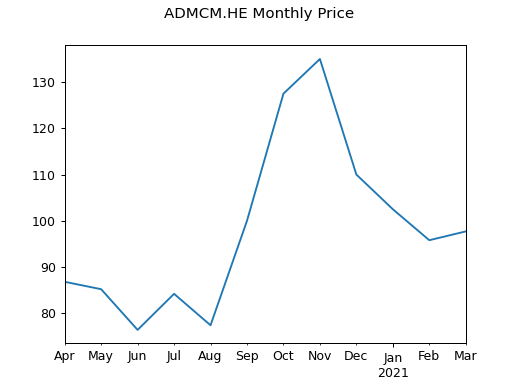

<IPython.core.display.Javascript object>


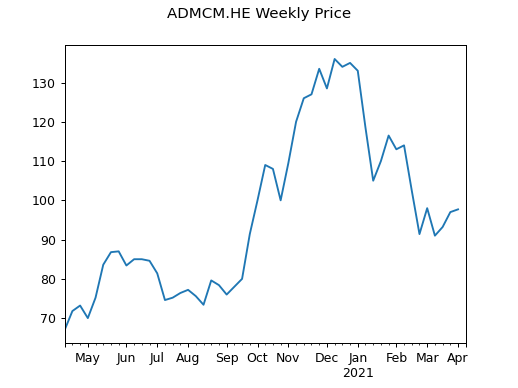

<IPython.core.display.Javascript object>


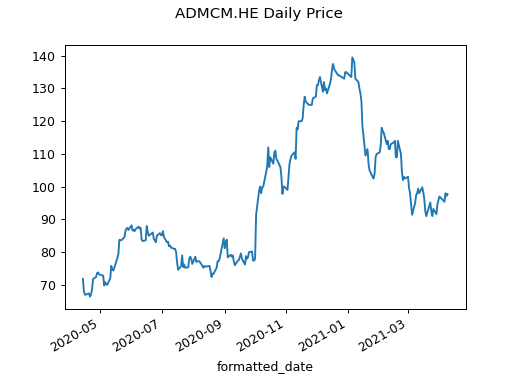

<IPython.core.display.Javascript object>


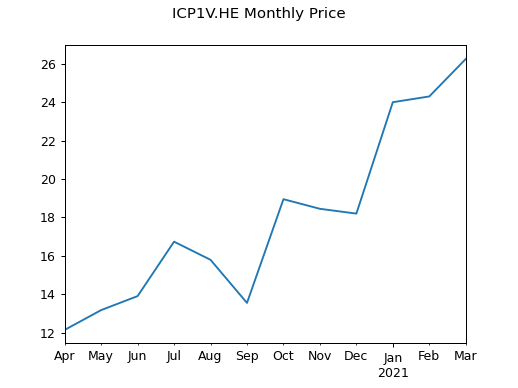

<IPython.core.display.Javascript object>


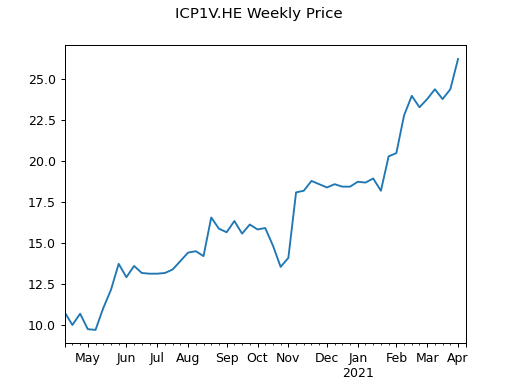

<IPython.core.display.Javascript object>


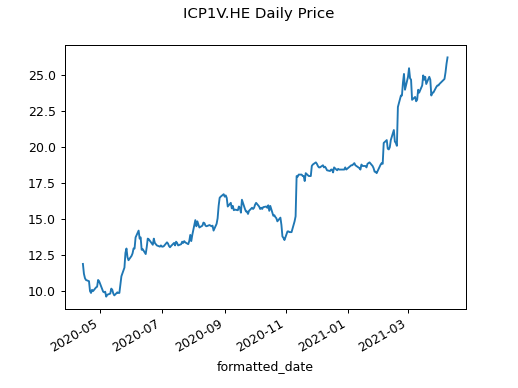

<IPython.core.display.Javascript object>


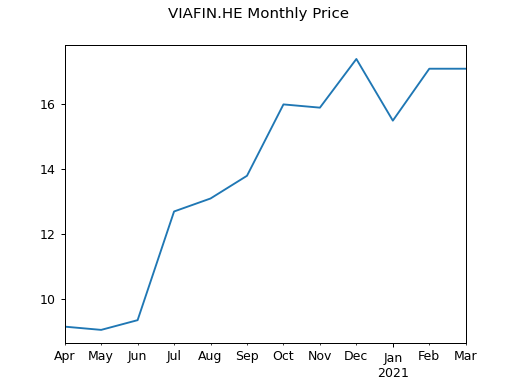

<IPython.core.display.Javascript object>


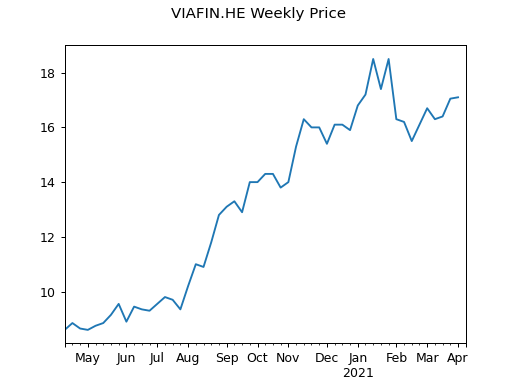

<IPython.core.display.Javascript object>


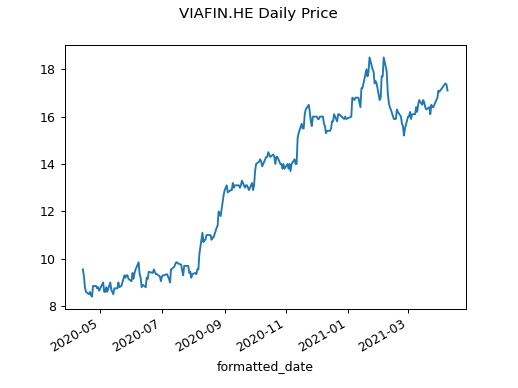

<IPython.core.display.Javascript object>


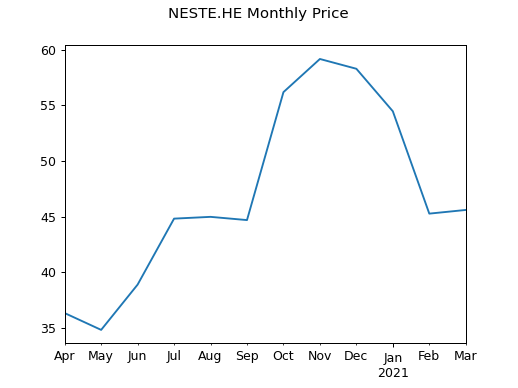

<IPython.core.display.Javascript object>


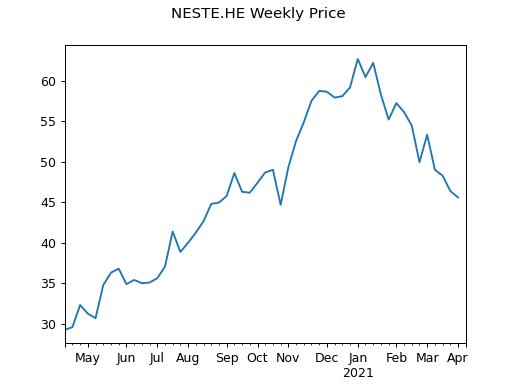

<IPython.core.display.Javascript object>


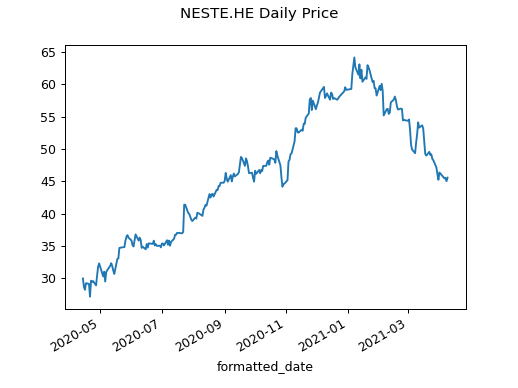

<IPython.core.display.Javascript object>


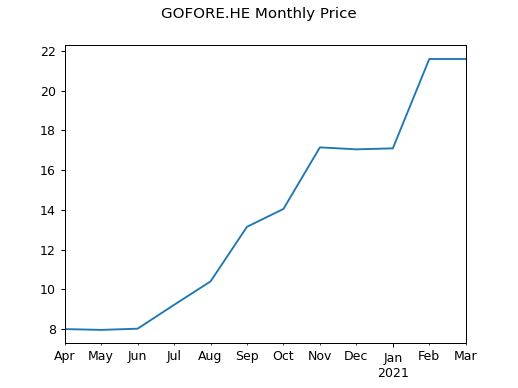

<IPython.core.display.Javascript object>


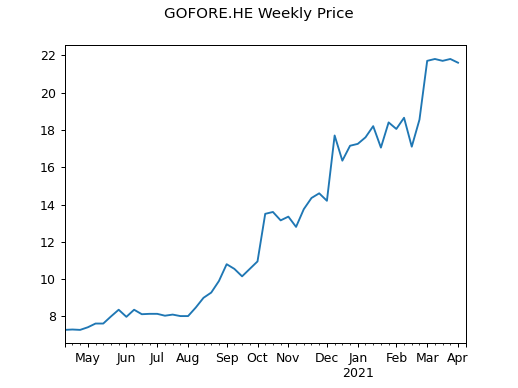

<IPython.core.display.Javascript object>


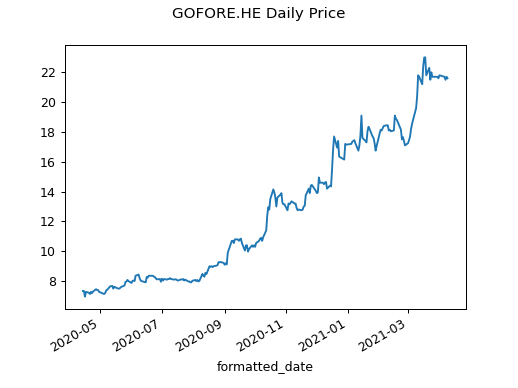

In [20]:
for i in top_companies:
    fig1, ax1 = plt.subplots()
    plt.suptitle(f"{i} Monthly Price")
    df_monthly[i].plot(ax=ax1)
    
    fig2, ax2 = plt.subplots()
    plt.suptitle(f"{i} Weekly Price")
    df_weekly[i].plot(ax=ax2)
   
    fig3, ax3 = plt.subplots()
    plt.suptitle(f"{i} Daily Price")
    df_daily[i].plot(ax=ax3)